In [23]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("rise.css", "r").read()
    return HTML(styles)
css_styling()

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input\1_gFC2bTg3uihp1klknWU0qg.gif
../input\airline_passengers.csv
../input\graph.png
../input\holt winter.png
../input\Holt-winter additive.png
../input\Holt-winter single exponential smoothing.png
../input\macrodata.csv
../input\sample_data.csv
../input\Space_Corrected.csv
../input\timeseries_data2.xlsx
../input\Weather Station Locations.csv
../input\.ipynb_checkpoints\time-series-prediction-tutorial-with-eda-checkpoint.ipynb
../input\AirQualityUCI\AirQualityUCI.csv
../input\AirQualityUCI\AirQualityUCI.xlsx
../input\demand_store_forecast\train.csv
../input\operations\operations.csv
../input\Summary of Weather\Summary of Weather.csv


# Introduction

In this kernel, the essentials of the time series analysis is demonstrated. The datasets used is the US macroeconmic data and Sales passengers data.  

- Error, Trend and Seasonality Decomposition using Statsmodels Seasonal Decomposition (refresher)
- Exponential Smoothing using Pandas EWMA and Holt Winters method for Single, Double and Triple Exponential           Smoothing
- Forecast into the real future using Holt Winters triple exponential method

Credit Source: <a href ="https://www.kaggle.com/prakharprasad/smoothing-holt-winters-forecast/data?select=macrodata.csv">Link </a>

## Part I - Time Series Decomposition

### Import Libraries
Note the statsmodels specific libraries used in this kernel. 
  

In [25]:
# arrays and dataframes
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# time series - statsmodels
from statsmodels.tsa.filters.hp_filter import hpfilter  # Hodrick Prescott filter for cyclic & trend separation
from statsmodels.tsa.seasonal import seasonal_decompose # Error Trend Seasonality decomposition

# holt winters 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing

# consistent plot size wherever not specifiied
from pylab import rcParams
rcParams['figure.figsize'] = (15,8)

In [26]:
# Load the US Macro economic data
usmacro = pd.read_csv('../input/macrodata.csv',index_col=0,parse_dates=True)
usmacro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Any of the columns can be explored and used for time series analysis. But first we will visualize one of the columns - realgdp

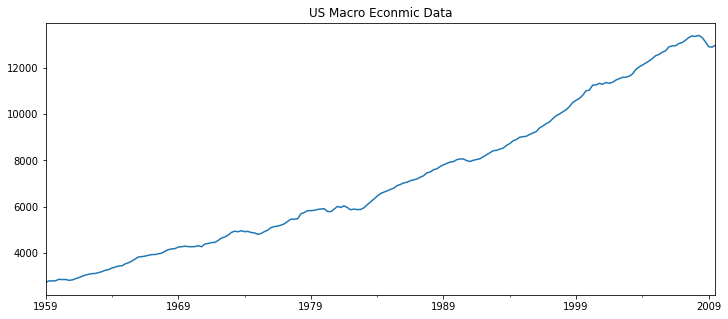

In [27]:
# visualize the realgdp --- > will use the capabilities of pandas plotting capability
usmacro['realgdp'].plot(figsize=(12,5),title='US Macro Econmic Data').autoscale(axis='x',tight=True)

## ETS - Error, Trend and Seasonality Decomposition

The decomposition of a time series attempts to isolate individual components such as error, trend and seasonality. `Statsmodels` provided *seasonal decomposition* tool to separate out the different components. <p> To demonstrate the seasonal decomposition capability of statsmodels, I will make use of the airline passenger data. More info refer here:
<a> https://www.statsmodels.org/stable/api.html#filters-and-decompositions </a>

Remember - Additive model is used when the trend component is more constant over time. Example, every year 20,000 passengers are added. Multiplicative model is used when the trend increases/decreases at a non linear rate. example, every year the number of airline passengers doubles by 20,000.

In [28]:
airline = pd.read_csv('../input/airline_passengers.csv', index_col='Month', parse_dates=True)

In [29]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
# decompose the time series
decompose_result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')

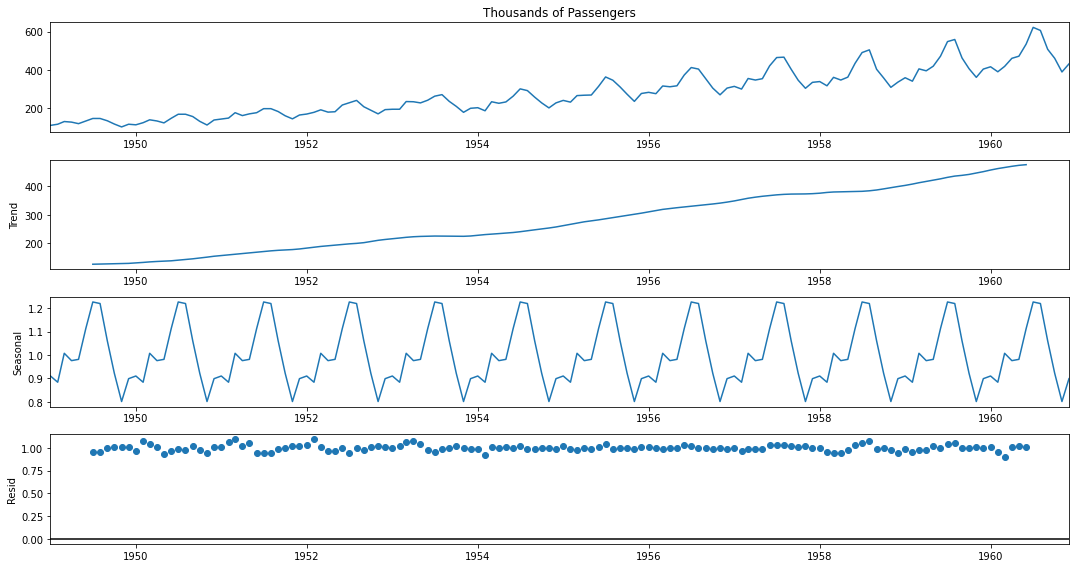

In [31]:
fig = decompose_result.plot()
plt.show()

Tip: Sometimes, the plot gets plotted twice. To get rid of this, just use a semi-colon at the end of the plot. 

In [ ]:
# decompose the time series for us gdp
gdp_decompose = 

In [ ]:
# plot the decomposed gdp


So here we see the original graph, the trend, seasonal and the residual or the error.

# Part II - Fit various models to existing data


<br>

<div style="font-size:4em; text-align:center; margin-bottom:30px; color:#00746E"><b>UNIVARIATE</b></div>

In [15]:
# Let's use the Store dataset which contains the sales of items in multiple stores. 
store = pd.read_csv("../input/demand_store_forecast/train.csv", parse_dates = True, index_col = 'date')
store.head() 

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [ ]:
data = store.copy()
data.index #DateTime index

In [ ]:
data.item.value_counts() #Number of sales per item

In [ ]:
# Filter Store 2, Item # 50
data = data[(data['store'] == 2) & (data['item'] == 50)]

In [ ]:
data.index # Let's look at the range of Date index.

In [ ]:
data.head()

In [ ]:
data.plot(figsize = (15,8), title = 'Sales')

In [ ]:
# Creating train and test set 
# Train set : 2013 Jan - 2017 June, Test set: 2017 July - Dec 
train =
test =
test.tail()

Let's visualise the train and test together to see how they vary over a time period.

In [ ]:
#Plotting data
train.sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
test.sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()

# Random Walk (Naive)<span style="color:#20419a">
    
Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. 
This is called <b> Naive Method </b>.

$\hat{y}_{t+1} =  $y$_{t}$

Now we will implement the Naive method to forecast the prices for test data.

In [ ]:
dd= np.asarray(train.sales) # Convert to an array
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1] # Naive forecast y(t+1) = y(t)
plt.figure(figsize=(12,8))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index,test['sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
# Next we will calculate the RMSE to check accuracy of Naive Model on test data set. 
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.sales, y_hat.naive))
print("RMSE for Naive Method : ", round(rms, 2))

# Moving Averages

## SMA - Simple Moving Averages

In [ ]:
# This time we will reuse the Airline dataset.
airline.head()

In [ ]:
airline.dropna(inplace=True)

Create Moving Average 30 days using the `rolling(window)` and `mean` function. 

In [ ]:
data['30-days-SMA'] = data['sales'].rolling(window=30).mean()

In [ ]:
# Now create a 60-days SMA. 
data['60-days-SMA'] = 
data.plot(title='Simple Moving Averages', y= ['sales', '30-days-SMA', '60-days-SMA']);

Note that rolling introduces the NaN depending on the window size selected. However there are some disadvantages of simple moving average
- Smaller windows will lead to more noise, rather than signal
- It will always lag by the size of the window (see the MA starts after a certain lag above in the figure)
- It will never reach to full peak or valley of the data due to the averaging.
- Does not really inform you about possible future behavior, all it really does is describe trends in your data.
- Extreme historical values can skew your SMA significantly

To help fix some of these problems, we have the EWMA or the Exponentially Weighted Moving Average

## EWMA - Exponentially Weighted Moving Average
EWMA alows to reduce the lag by putting more weight to the recent readings or values. The <span style="color:blue">amount of weight</span> applied is dependent on the <span style="color:lightgreen">actual parameters in the EWMA</span> and the <span style="color:lightgreen">number of periods given in a window size.</span> 

More information can be found here 
<a href ="https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows">EWM Pandas</a> 

Note: EWMA applies Single Exponential Smoothing Function `ewm`. Set `adjust = False` so that the exponentially weighted function is calculated recursively:

$y_0$ = $x_0$

$y_t$ = $x_0$ = (1−$\alpha$)$y_{(t−1)}$ + $\alpha$$x_t$

In [ ]:
# Perform ewm on the store dataset for span = 120. Create 1 new column called ewma120.
data['ewma120'] = 

## Comparing SMA to EWMA
Now compare your SMA to EWMA for GDP dataset.
Example: 

    `airline[['Thousands of Passengers','ewma12','6-month-SMA','12-month-SMA']].plot()`

In [ ]:
# Compare your SMA to EWMA here.


# Holt Winters - Simple, Double and Triple Exponential Smoothing

Moving Averages and Single Exponential Smoothing does a poor job of forecasting when there is trend and seasonality in the data. Double and Triple exponential smoothing is best suited for this kind of time-series data. 
<p> Holt winters has all the three variations - <span style="color:red"> Single, Double and Triple exponential smoothing. </span>
<p> Double Exponential smoothing uses a smoothing factor that addresses <span style="color:blue">trend</span>. Triple Exponential smoothing uses a smoothing factor that addresses <span style="color:blue">seasonality.<span>

<p> Span corresponds to what is commonly called an <i>“N-day EW moving average”</i>. Alpha specifies the smoothing factor 
directly.</p>

Refer <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows">Exponentially weighted window</a>

To work with forecasting models like Holt Winters, ARIMA, SARIMA etc., the datetime index frequency needs to be set. The Store dataset index indicates dates daily. Hence we can set this as 'D'. Can use the `pd.DateTime.Index(freq)`
For `Index objects` refer here <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html">pd.Index</a>.

For frequency strings: refer here: <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases">Click here</a>

In [ ]:
# Set the frequency of the date time index as Monthly start as indicated by the data. 
data

In [ ]:
# Check the index of the store data
data.index

## Simple Exponential Smoothing - Using Holt Winters
This is same as `ewm` method in Pandas. For simple exponential smoothing, the function is called `SimpleExpSmoothing`.
<a href="https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing"> Source</a>

In [16]:
# set the span and the smoothing factor alpha
span = 365.5
alpha = 2 / (span+1)

Using the `SimpleExpSmoothing` and `fit` method, apply the smoothing factor alpha and label the new feature as <u>SES12</u>.

<i>E.g. airline['SES12'] = SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)</i>

NOTE: For some reason, when optimized=False is passed into .fit(), the statsmodels SimpleExpSmoothing function shifts fitted values down one row. We fix this by adding `.shift(-1)` after .fittedvalues

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Perform the SES on the sales column
data['SES12'] = 

Now compare the ewma12 from Pandas and SES12 from the statsmodel package. What do you observe?

In [ ]:
# airline[['Thousands of Passengers','ewma12','SES12']].plot(title='Pandas EWMA and Statsmodels Holt Winters Single Exponential Smoothing');    

                   

In [ ]:
# Check using the df.head() function.


Both the EWMA and Holt Winters Single Exponential Smoothing curve fit each other completely. 

## Double Exponential Smoothing

Using the `ExponentialSmoothing` method, perform double exponential smoothing on the store dataset. 

In [ ]:
# data['DES12']  ExponentialSmoothing(col, trend = 'add').fit().fittedvalues.shift(-1)
data['DES12'] = 

In [ ]:
# Visualise the SES with DES of the store data. 
data[['sales', 'SES12', 'DES12']].plot(title = "Holt-Winters Single & Double Exponential SMoothing")

Here the double exponential smoothing completely overlaps on the original data. Let's plot for the last 24 months.

In [ ]:
data[['sales','SES12','DES12']].iloc[:24].plot(title='Holt Winters Single & Double Exponential Smoothing Last 24 months').autoscale(axis='x',tight=True);

Lets replot the above using the multiplicative adjustment instead of additive.

In [ ]:
data['DES12_mul'] = 

In [ ]:
data[['sales','DES12','DES12_mul']].iloc[:24].plot(title='Holt Winters Double Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

Although minor, the multiplicative adjustment gives a better result compared to the additive adjustment for the trend.

## Triple Exponential Smoothing 

In [ ]:
# Additive trend. Complete the code.
data['TESadd12'] = ExponentialSmoothing().fit().fittedvalues

In [ ]:
# Multiplicative trend. Complete the code
data['TESmul12'] = ExponentialSmoothing().fit().fittedvalues

In [ ]:
data.head()

In [ ]:
data[['sales','TESadd12','TESmul12']].iloc[:24].plot(title='Holt Winters Triple Exponential Smoothing Last (Additive vs Multiplicative)').autoscale(axis='x',tight=True);

# Part III - Forecasting with Holt Winters Method

Lets read the sales data again to have a fresh copy

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [19]:
store = pd.read_csv("../input/demand_store_forecast/train.csv", parse_dates = True, index_col = 'date')
store.head() 

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [20]:
# Filter Store 2, Item # 50
store = store[(store['store'] == 2) & (store['item'] == 50)]

In [ ]:
store.index.freq = 'D'

In [ ]:
store.index # Get the index

In [ ]:
store.tail() # Last 5 rows of Store Series

In [ ]:
# Number of months of data 
.75*len(store)

### Split into training and test set
It is important to remember that the time-series are dependent on time, hence it is wise to split train test by sequence. 
<span style = "color:#00a19C"> ORDER MATTERS! </span>

In [ ]:
# Split into 75% train and 25% test set. Remember that sequence matters in time-series forecasting!
train_store = store[:1370] 
test_store = store[1370:] 

In [ ]:
len(test_store)

### Fit the model on the train set
Seasonal periods with value <b>365<b> indicates the seasonality we expect in the data. For item sales we can safely assume that the <u>seasonality would repeat every 30 days.</u>

In [ ]:
# Fit Exponential Smoothing. Use trend = 'mul', seasonal = 'mul', seasonal_periods = 365. Complete the code below.
fitted_model = ExponentialSmoothing(

In [ ]:
# Predict the test set. Complete the code.
test_predictions = fitted_model.forecast().rename('HW Test Forecast')

In [ ]:
test_predictions[:10]

In [ ]:
train_store['sales'].plot(legend=True,label='TRAIN')
test_store['sales'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

Next we will plot also the predicted test data

In [ ]:
train_store['sales'].plot(legend=True,label='TRAIN')
test_store['sales'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

Plot for the recent rows

In [ ]:
# Complete code here. 


### Evaluation metrics

In [22]:
# Import evaluation metrics (mean_absolute_error, mean_squared_er)

In [ ]:
# Print Mean Absolute Error here. 

In [ ]:
#Print Mean Squared Error here. 


In [ ]:
test_store.describe()

## END